# Challenge Data - Football: qui va gagner ?

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Pour utiliser les donnés sur Google Drive
COLAB = False

In [ ]:
if COLAB:
    from google.colab import drive
    drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [17]:
if COLAB:
    base_path = '/content/drive/MyDrive/data-challenge'
else:
    base_path = './data'

path_player_away_train = f'{base_path}/Train_Data/train_away_player_statistics_df.csv'
path_player_home_train = f'{base_path}/Train_Data/train_home_player_statistics_df.csv'
path_team_away_train = f'{base_path}/Train_Data/train_away_team_statistics_df.csv'
path_team_home_train = f'{base_path}/Train_Data/train_home_team_statistics_df.csv'
path_target = f'{base_path}/Y_train_1rknArQ.csv'
path_target_sup = f'{base_path}/benchmark_and_extras/Y_train_supp.csv'

## Exploration des données

### Lecture des données

In [31]:
train_team_home = pd.read_csv(path_team_home_train, sep=',')
train_team_away = pd.read_csv(path_team_away_train, sep=',')

train_player_away = pd.read_csv(path_player_away_train, sep=',')
train_player_home = pd.read_csv(path_player_home_train, sep=',')

In [32]:
train_target = pd.read_csv(path_target, sep=',')
train_target_sup = pd.read_csv(path_target_sup, sep=',')

On va combiner les données des équipes

In [ ]:
train_team_home.columns = 'HOME_' + train_team_home.columns
train_team_away.columns = 'AWAY_' + train_team_away.columns

In [39]:
train_team =  pd.concat([train_team_home.iloc[:, 2:], train_team_away.iloc[:, 2:]],join='inner',axis=1)

In [81]:
print(f'Dimension du dataset: {train_team.shape}')

Dimension du dataset: (12303, 282)


En analysant les données manquantes sur les colonnes, on voit que la colonne avec le plus de données manquantes a un percentage de 27% de données manquantes 

In [93]:
colonne_missing_values = train_team.isna().sum().sort_values(ascending=False)/train_team.shape[0]
colonne_missing_values

HOME_TEAM_INJURIES_5_last_match_std                 0.269690
AWAY_TEAM_INJURIES_5_last_match_std                 0.269284
AWAY_TEAM_INJURIES_5_last_match_sum                 0.238397
AWAY_TEAM_INJURIES_5_last_match_average             0.238316
HOME_TEAM_INJURIES_5_last_match_sum                 0.238316
                                                      ...   
AWAY_TEAM_ATTACKS_5_last_match_average              0.000000
AWAY_TEAM_DANGEROUS_ATTACKS_5_last_match_average    0.000000
HOME_TEAM_SHOTS_OFF_TARGET_season_sum               0.000000
AWAY_TEAM_DANGEROUS_ATTACKS_5_last_match_std        0.000000
HOME_TEAM_NAME                                      0.000000
Length: 282, dtype: float64

In [106]:
print(f'Percentage de colonnes avec de données manquantes: {len(colonne_missing_values[colonne_missing_values > 0])*100/len(colonne_missing_values):.3f} %')

Percentage de colonnes avec de données manquantes: 83.688 %


En analysant sur les lignes, on voit qu'on a des lignes avec beaucoup de données manquantes (> 50%)

In [88]:
row_missing_values = train_team.isna().sum(axis=1).sort_values(ascending=False)/train_team.shape[1]
row_missing_values

5646     0.553191
10163    0.553191
4624     0.439716
835      0.432624
8538     0.432624
           ...   
12272    0.000000
12271    0.000000
12275    0.000000
18       0.000000
15       0.000000
Length: 12303, dtype: float64

In [105]:
print(f'Percentage de lignes avec de données manquantes: {len(row_missing_values[row_missing_values > 0])*100/len(row_missing_values):.3f} %')

Percentage de lignes avec de données manquantes: 32.838 %


Dans un premier moment, on ne va pas enlever des lignes/colonnes pour ne pas prendre le risque de perdre des informations avec cette opération

Comme la colonne avec le plus de données manquantes a 25% de données manquantes, on va faire une imputation des données

On considère qu'on va avoir suffisament des données pour faire cette imputation sans inserer beaucoup de biais

In [107]:
# TODO: faire imputation

*Player away statistics*

In [10]:
print('dimension of the dataset:', train_player_away.shape)
train_player_away.head(n=3)

dimension of the dataset: (236132, 307)


,ID,LEAGUE,TEAM_NAME,POSITION,PLAYER_NAME,PLAYER_ACCURATE_CROSSES_season_sum,PLAYER_ACCURATE_PASSES_season_sum,PLAYER_AERIALS_WON_season_sum,PLAYER_ASSISTS_season_sum,PLAYER_BIG_CHANCES_CREATED_season_sum,...,PLAYER_STARTING_LINEUP_5_last_match_std,PLAYER_SUCCESSFUL_DRIBBLES_5_last_match_std,PLAYER_TACKLES_5_last_match_std,PLAYER_TOTAL_CROSSES_5_last_match_std,PLAYER_TOTAL_DUELS_5_last_match_std,PLAYER_YELLOWCARDS_5_last_match_std,PLAYER_PUNCHES_5_last_match_std,PLAYER_LONG_BALLS_5_last_match_std,PLAYER_LONG_BALLS_WON_5_last_match_std,PLAYER_SHOTS_OFF_TARGET_5_last_match_std
0,0,Ligue 1,Olympique Marseille,defender,Lucas Perrin,0.0,19.0,20.0,0.0,0.0,...,70.0,30.0,46.0,0.0,79.0,99.0,NaN,NaN,NaN,NaN
1,0,Ligue 1,Olympique Marseille,midfielder,Kevin Strootman,2.0,48.0,19.0,28.0,8.0,...,77.0,0.0,40.0,6.0,46.0,77.0,NaN,NaN,NaN,NaN
2,0,Ligue 1,Olympique Marseille,goalkeeper,Yohann Pelé,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [ ]:
train_player_away.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236132 entries, 0 to 236131
Columns: 307 entries, ID to PLAYER_SHOTS_OFF_TARGET_5_last_match_std
dtypes: float64(302), int64(1), object(4)
memory usage: 553.1+ MB


In [ ]:
#numero des équipes, leagues et jouers
teams = train_player_away['TEAM_NAME'].unique()
print(f"Número d'équipes: {len(teams)}")
leagues = train_player_away['LEAGUE'].unique()
print(f'Número de leagues: {len(leagues)}')
players = train_player_away['PLAYER_NAME'].unique()
print(f'Número de jouers: {len(players)}')

numero des équipes est 350
numero des leagues est 13
numero de jouers est 13673


In [ ]:
# l'ID n'est pas associé à l'équipe!! Il y a beacoup plus des ID que des équipes
# ID pour chaque équipe:
team_index_dict = train_player_away.drop_duplicates(subset='TEAM_NAME').set_index('TEAM_NAME').to_dict()['ID']

In [ ]:
train_player_away.describe()

,ID,PLAYER_ACCURATE_CROSSES_season_sum,PLAYER_ACCURATE_PASSES_season_sum,PLAYER_AERIALS_WON_season_sum,PLAYER_ASSISTS_season_sum,PLAYER_BIG_CHANCES_CREATED_season_sum,PLAYER_BIG_CHANCES_MISSED_season_sum,PLAYER_BLOCKED_SHOTS_season_sum,PLAYER_CAPTAIN_season_sum,PLAYER_CLEARANCES_season_sum,...,PLAYER_STARTING_LINEUP_5_last_match_std,PLAYER_SUCCESSFUL_DRIBBLES_5_last_match_std,PLAYER_TACKLES_5_last_match_std,PLAYER_TOTAL_CROSSES_5_last_match_std,PLAYER_TOTAL_DUELS_5_last_match_std,PLAYER_YELLOWCARDS_5_last_match_std,PLAYER_PUNCHES_5_last_match_std,PLAYER_LONG_BALLS_5_last_match_std,PLAYER_LONG_BALLS_WON_5_last_match_std,PLAYER_SHOTS_OFF_TARGET_5_last_match_std
count,236132.00000,207662.000000,207662.000000,207662.000000,232303.000000,206107.000000,206107.000000,206107.000000,24985.000000,207662.000000,...,228445.000000,179048.000000,204207.000000,204207.000000,204207.000000,228445.000000,66054.000000,0.0,0.0,0.0
mean,6151.37958,7.935477,22.728737,12.696791,9.282226,9.258642,7.177165,10.380671,34.673964,13.465478,...,32.590807,14.612869,21.640130,12.497872,27.032658,25.166745,2.099676,NaN,NaN,NaN
std,3551.66707,15.146502,20.894778,16.165656,16.387778,15.770194,14.581732,16.858181,35.226577,18.396448,...,36.436853,17.529688,19.341787,16.822583,19.397950,33.647951,11.139760,NaN,NaN,NaN
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,3079.00000,0.000000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,NaN,NaN,NaN
50%,6150.00000,1.000000,18.000000,7.000000,0.000000,0.000000,0.000000,3.000000,21.000000,6.000000,...,0.000000,12.000000,19.000000,7.000000,26.000000,0.000000,0.000000,NaN,NaN,NaN
75%,9227.00000,9.000000,34.000000,18.000000,14.000000,14.000000,9.000000,14.000000,66.000000,18.000000,...,70.000000,23.000000,33.000000,19.000000,39.000000,63.000000,0.000000,NaN,NaN,NaN
max,12302.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,NaN,NaN


In [ ]:
train_player_away.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236132 entries, 0 to 236131
Columns: 307 entries, ID to PLAYER_SHOTS_OFF_TARGET_5_last_match_std
dtypes: float64(302), int64(1), object(4)
memory usage: 553.1+ MB


<ipython-input-71-99edf96621df>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(top30_null.index, rotation=45, ha='right')


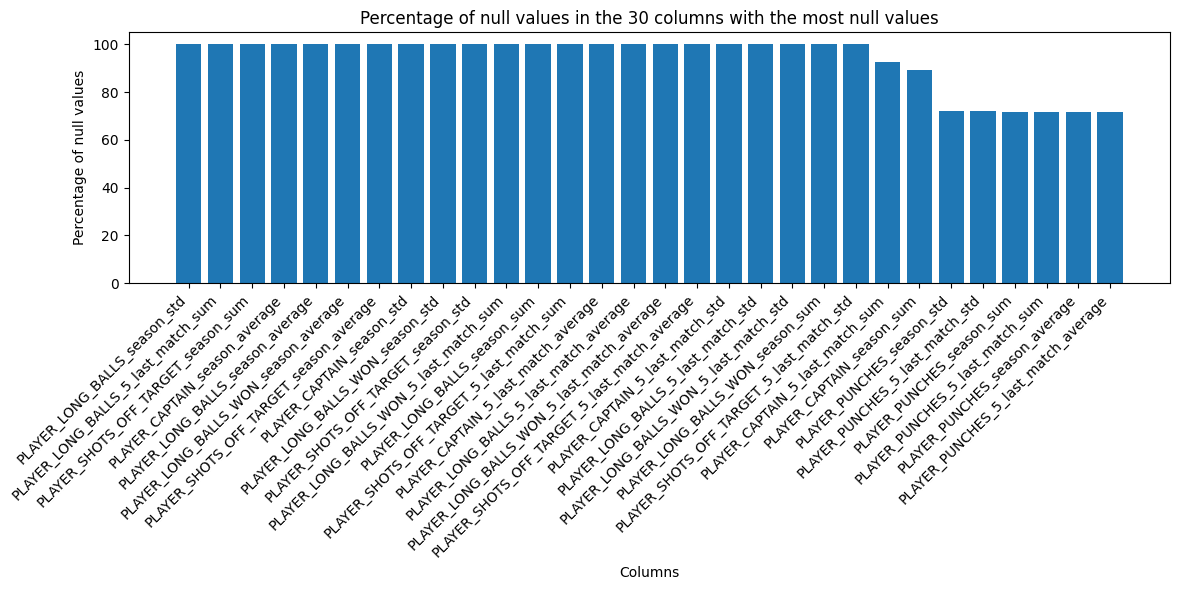

PLAYER_LONG_BALLS_season_std                    100.000000
PLAYER_LONG_BALLS_5_last_match_sum              100.000000
PLAYER_SHOTS_OFF_TARGET_season_sum              100.000000
PLAYER_CAPTAIN_season_average                   100.000000
PLAYER_LONG_BALLS_season_average                100.000000
PLAYER_LONG_BALLS_WON_season_average            100.000000
PLAYER_SHOTS_OFF_TARGET_season_average          100.000000
PLAYER_CAPTAIN_season_std                       100.000000
PLAYER_LONG_BALLS_WON_season_std                100.000000
PLAYER_SHOTS_OFF_TARGET_season_std              100.000000
PLAYER_LONG_BALLS_WON_5_last_match_sum          100.000000
PLAYER_LONG_BALLS_season_sum                    100.000000
PLAYER_SHOTS_OFF_TARGET_5_last_match_sum        100.000000
PLAYER_CAPTAIN_5_last_match_average             100.000000
PLAYER_LONG_BALLS_5_last_match_average          100.000000
PLAYER_LONG_BALLS_WON_5_last_match_average      100.000000
PLAYER_SHOTS_OFF_TARGET_5_last_match_average    100.0000

In [ ]:
 # analyse des éléments null sur le colomns

null_percentage = (train_player_away.isnull().sum() / len(train_player_away)) * 100
null_sorted = null_percentage.sort_values(ascending=False)
top30_null = null_sorted.head(30)
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(top30_null.index, top30_null.values)
ax.set_xticklabels(top30_null.index, rotation=45, ha='right')
ax.set_xlabel('Columns')
ax.set_ylabel('Percentage of null values')
ax.set_title('Percentage of null values in the 30 columns with the most null values')
plt.tight_layout()
plt.show()

print(null_sorted[:30])

In [ ]:
# Je vais effacer les colomns ou on a le 100% des données manquant

top22_null_values = null_sorted.head(22)
col_to_drop = top22_null_values.index
pla_train = train_player_away.drop(columns=col_to_drop) # nouveau dataset sans colomns qui sont null
pla_train.isnull().all()

,0
ID,False
LEAGUE,False
TEAM_NAME,False
POSITION,False
PLAYER_NAME,False
...,...
PLAYER_TACKLES_5_last_match_std,False
PLAYER_TOTAL_CROSSES_5_last_match_std,False
PLAYER_TOTAL_DUELS_5_last_match_std,False
PLAYER_YELLOWCARDS_5_last_match_std,False


il y a encore plusieurs colomns avec beacoup des données manquant. On peut penser d'appliquer la tecnique MICE ??


In [73]:
# nombre des éléments null sur les lignes

ele_null = pla_train.isnull().any(axis = 1)
if ele_null.all():
  print('toutes les lignes ont au moins 1 élément null')
else:
  numero = ele_null.sum()
  print(f'il y a {numero} lignes sur {len(pla_train.index)} lignes totales avec au moins 1 élément null')

il y a 231453 lignes sur 236132 lignes totales avec au moins 1 élément null
